## Removendo a tendencia com Regressao Linear

Remover a tendência de uma série temporal pode ajudar a tornar os dados mais estacionários, o que pode melhorar o desempenho de muitos modelos estatísticos e métodos de previsão. Além disso, remover a tendência também pode ajudar a reduzir a complexidade dos dados e torná-los mais fáceis de analisar e interpretar.

Neste script vamos remover a tendencia dos dados com regressao linear, visto que esse modelo cria uma reta inclinada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8] 

In [2]:
df = pd.read_excel('serie_historica_volume_portos.xlsx')
planta_fase = input('Descreva a planta e a fase: ')
df_2 = df[df['PLANTA_PROCESSO'] == planta_fase]
df_g = df_2.resample(rule='M', on='DATA')['TOTAL_VALOR'].sum()
titulo_grafico = df_2['PLANTA_PROCESSO'].unique()[0]

In [4]:
X = [i for i in range(0,len(df_g))]
X = np.reshape(X, (len(X),1))
y = df_g.values

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [7]:
tendencia = model.predict(X)

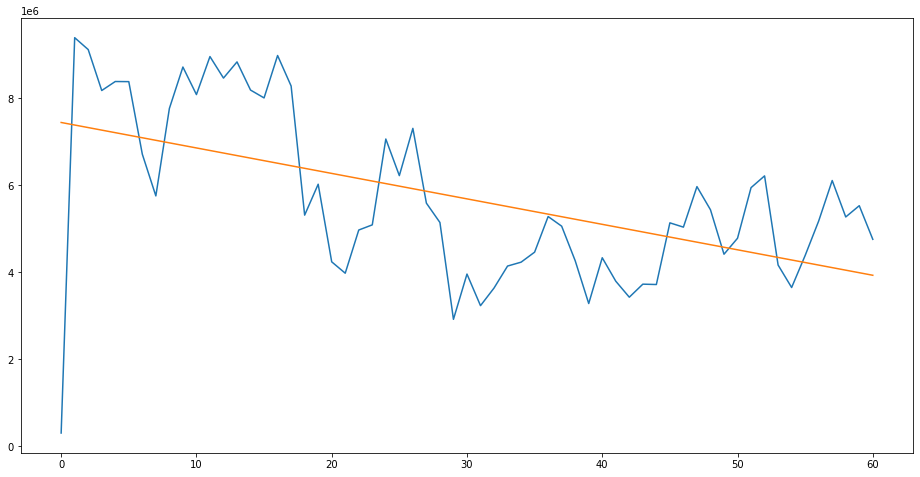

In [10]:
plt.plot(y)
plt.plot(tendencia)
plt.show()

In [11]:
sem_tendencia = [y[i] - tendencia[i] for i in range(0,len(df_g))]

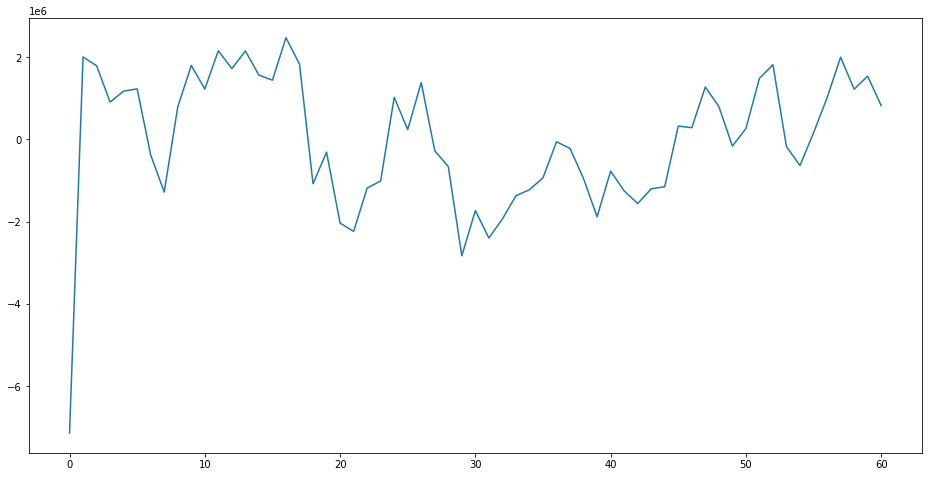

In [12]:
plt.plot(sem_tendencia)
plt.show()